Cube Browser is a [Python](http://python.org) library that makes it easy to explore and visualize geographical, meterological and oceanographic datasets.  Cube Browser is based on the [HoloViews](http://holoviews.org) library for flexible visualizations of multidimensional data, the [Iris](http://scitools.org.uk/iris) library for storing and processing climate and weather data, and the [Cartopy](http://scitools.org.uk/cartopy) library for working with cartographic projections and visualizations in [Matplotlib](http://matplotlib.org/).  

Here's a simple example:

In [1]:
import holoviews as hv
import geoviews as gv
from cartopy import crs
from cartopy import feature as cf

hv.notebook_extension()

/home/h06/cbosley/miniconda2/envs/cube_explorer/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


:Layout
   .Feature.I       :Feature
   .Feature.II      :Feature
   .Overlay.Overlay :Overlay
      .Feature.I  :Feature
      .Feature.II :Feature
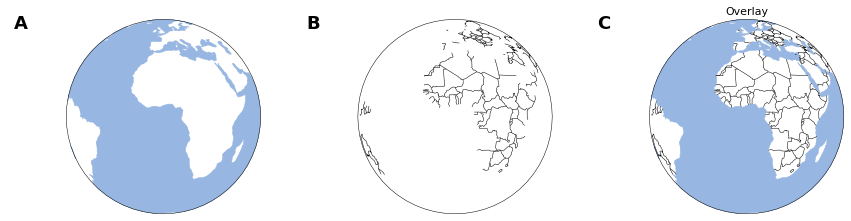

In [3]:
%%opts Feature [projection=crs.Geostationary()]

coasts  = gv.Feature(cf.COASTLINE)
borders = gv.Feature(cf.BORDERS)
ocean   = gv.Feature(cf.OCEAN)

ocean + borders + (ocean*borders).relabel("Overlay")

The following example loads a cube from [iris-sample-data](https://github.com/SciTools/iris-sample-data) and displays it as follows:

In [4]:
import iris
surface_temp = iris.load_cube(iris.sample_data_path('GloSea4', 'ensemble_001.pp'))
print surface_temp.summary()

surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -            x               -
          longitude                      -            -               x
     Auxiliary coordinates:
          forecast_period                x            -               -
     Scalar coordinates:
          forecast_reference_time: 2011-07-18 00:00:00
     Attributes:
          STASH: m01s00i024
          source: Data from Met Office Unified Model
          um_version: 7.6
     Cell methods:
          mean: time (1 hour)


With HoloViews, you can quickly view the data in the cube interactively:

/home/h06/cbosley/miniconda2/envs/cube_explorer/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:1334: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


:HoloMap   [time]
   :Overlay
      .Image.I   :Image   [longitude,latitude]   (surface_temperature)
      .Feature.I :Feature
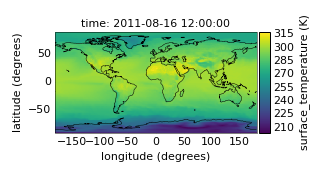
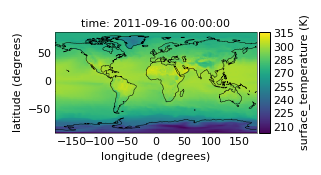
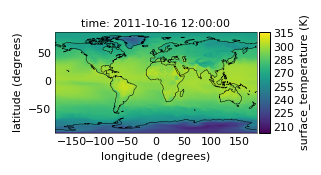
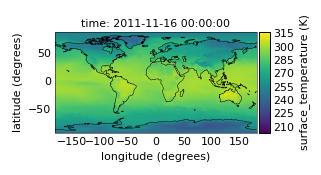
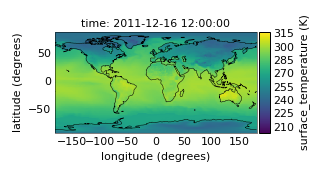
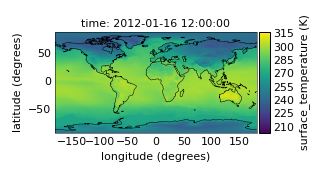

In [5]:
%%opts Image [colorbar=True] (cmap='viridis')
(hv.Dataset(surface_temp).groupby(['time'], group_type=gv.Image) * gv.Feature(cf.COASTLINE))